# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

Instructor: Melissa Laurino</br>
Spring 2024</br>

Name:Louise Ramos
</br>
Date: February 29, 2024
<br>
<br>
<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
<b>--</b>You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
<b>---</b>Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
<b>--</b>Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
<b>--</b>Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer any prompts in markdown cells.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

Basic usage of database commands in R with SQLite library: https://rsqlite.r-dbi.org/
SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [52]:
#Importing libraries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import calendar
from datetime import datetime

In [44]:
#Connecting to the database
conn = sqlite3.connect('sql-murder-mystery.db')

cursor = conn.cursor() #Creating a cursor 

In [33]:
# Getting column names
def get_column_names(table_name, cursor):
    cursor.execute(f"PRAGMA table_info({table_name})")
    columns = cursor.fetchall()
    column_names = [column[1] for column in columns]
    return column_names

# Displaying column names for each table
tables = [
    'crime_scene_report',
    'drivers_license',
    'facebook_event_checkin',
    'get_fit_now_check_in',
    'get_fit_now_member',
    'income',
    'interview',
    'person',
    'solution'
]

for table in tables:
    print(table)
    column_names = get_column_names(table, cursor)
    print(column_names)
    print()

crime_scene_report
['date', 'type', 'description', 'city']

drivers_license
['id', 'age', 'height', 'eye_color', 'hair_color', 'gender', 'plate_number', 'car_make', 'car_model']

facebook_event_checkin
['person_id', 'event_id', 'event_name', 'date']

get_fit_now_check_in
['membership_id', 'check_in_date', 'check_in_time', 'check_out_time']

get_fit_now_member
['id', 'person_id', 'name', 'membership_start_date', 'membership_status']

income
['ssn', 'annual_income']

interview
['person_id', 'transcript']

person
['id', 'name', 'license_id', 'address_number', 'address_street_name', 'ssn']

solution
['user', 'value']



We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [34]:
 #Looking for the top ten cities with the most crimes 
query_top_cities = """
SELECT type, COUNT(*) as count
FROM crime_scene_report
GROUP BY city
ORDER BY count DESC
LIMIT 10;
"""

# Execute the query and fetch the result into a pandas DataFrame
top_cities_result = pd.read_sql_query(query_top_cities, conn)

# Display the result
top_cities_result

,type,count
0,murder,9
1,murder,9
2,smuggling,8
3,assault,8
4,murder,8
5,arson,8
6,arson,7
7,murder,7
8,murder,7
9,assault,7


<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.

      type  count
0    arson      1
1  assault      2
2  bribery      1
3   murder      3
4  robbery      1
5    theft      1


Text(0.5, 1.0, 'Crimes in SQL City')

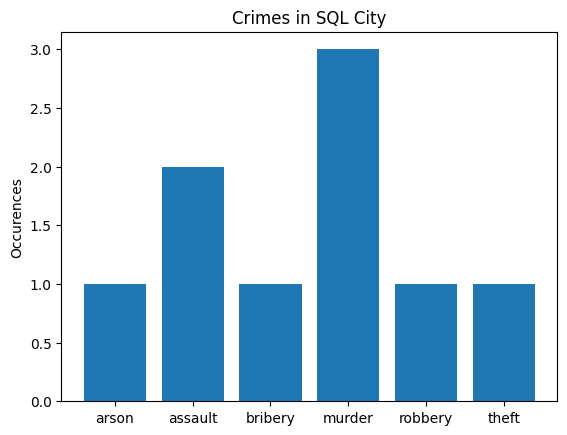

In [35]:
# Querying for COUNT of crimes in SQL City
query_count_crimes = """
SELECT type, COUNT(*) as count
FROM crime_scene_report
WHERE city = 'SQL City'
GROUP BY type
"""

# Execute the query and fetch the result into a pandas DataFrame
most_crimes_in_sql = pd.read_sql_query(query_count_crimes, conn)

# Show Result
print(most_crimes_in_sql)

# The crime committed most in SQL City was murder with 3 incidents and the second most committed crime was assault with 2 incidents.

# Plot for a visual for objective 1 using matplotlib:
plt.bar(most_crimes_in_sql["type"], most_crimes_in_sql["count"])
plt.ylabel('Occurences')
plt.title('Crimes in SQL City')

Answer: Murder

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [54]:
# Querying ALL FROM crime_scene_report WHERE city = "SQL City"
query_most_crimes_month = """
SELECT *
FROM crime_scene_report
WHERE city = 'SQL City'
"""

# Execute the query and fetch the result into a pandas DataFrame
most_crimes_month = pd.read_sql_query(query_most_crimes_month, conn)
# Casting column to datetime
most_crimes_month["date"] = most_crimes_month["date"].apply(str)
most_crimes_month["date"] = pd.to_datetime(most_crimes_month["date"])
# Getting most common month from date column
highest_month_num = most_crimes_month["date"].dt.month.mode()[0]
# Converting month number to name
highest_month = calendar.month_name[highest_month_num]


# Show results
print(most_crimes_month)
print(f"The most crimes are committed in the month of {highest_month}.")



        date     type                                        description  \
0 2018-02-15   murder                         REDACTED REDACTED REDACTED   
1 2018-02-15   murder  Someone killed the guard! He took an arrow to ...   
2 2017-07-12    theft  A lone hunter stalks the night, firing arrows ...   
3 2017-08-20    arson  Wield the Hammer of Sol with honor, Titan, it ...   
4 2017-11-10  robbery  The Gjallarhorn shoulder-mounted rocket system...   
5 2018-01-03  bribery  Apparently, Cayde thought it necessary to expo...   
6 2018-01-15  assault  Hamilton: Lee, do you yield? Burr: You shot hi...   
7 2018-01-15  assault                                   Report Not Found   
8 2018-01-15   murder  Security footage shows that there were 2 witne...   

       city  
0  SQL City  
1  SQL City  
2  SQL City  
3  SQL City  
4  SQL City  
5  SQL City  
6  SQL City  
7  SQL City  
8  SQL City  
The most crimes are committed in the month of January.


Answer: The most crimes are committed in January (Month 1)

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [37]:
# Querying for gyms
query_gym_members = """
SELECT membership_status, COUNT(*) as count
FROM get_fit_now_member
GROUP BY membership_status
"""

# Execute the query and fetch the result into a pandas DataFrame
gym_members = pd.read_sql_query(query_gym_members, conn)

# Show resulting DataFrame
gym_members




,membership_status,count
0,gold,68
1,regular,53
2,silver,63


Answer: The town would give them the regular gym membership.

In [38]:
#Disconnect from the database. Always remember to disconnect :) 
conn.close()
